# Out Of Lab Week 8
## November 22nd
### Songgun Lee

**Goal** : 

I want to verify Snell's Law and plot graphs to find a linear correlation.

Starting Time: 20:00


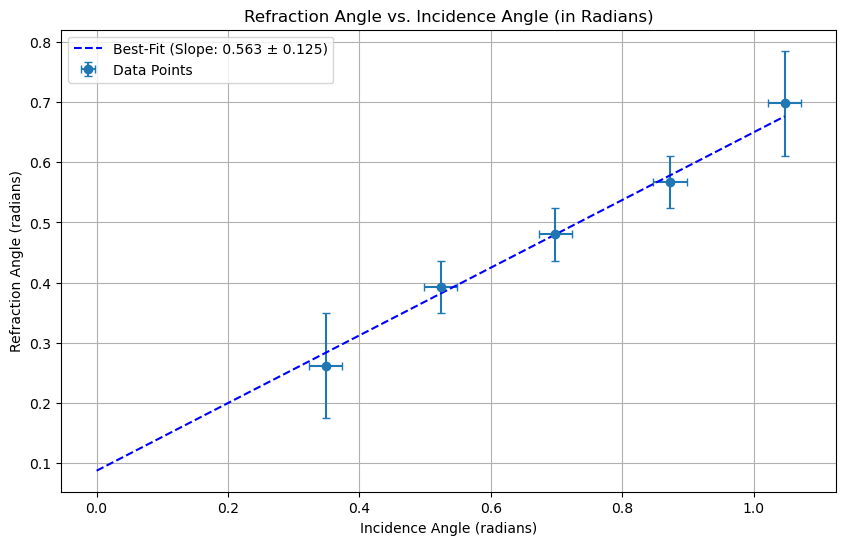

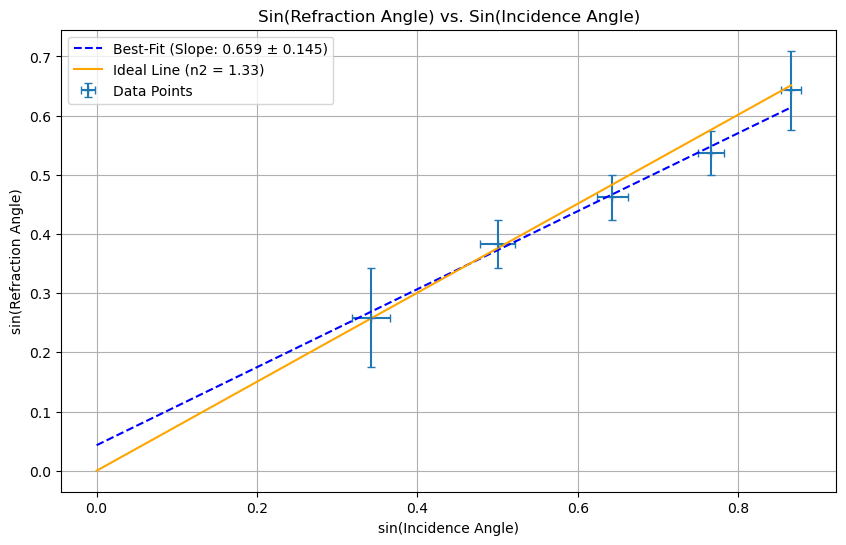

First Plot Results (Angle in Radians):
  Slope: 0.56 ± 0.12
  Intercept: 0.09 ± 0.09

Second Plot Results (Sin Values):
  Slope (1/Refractive Index): 0.66 ± 0.14
  Intercept: 0.04 ± 0.10
  Inverse of Slope (Refractive Index of Water): 1.52 ± 0.33
  Chi-Squared: 0.36
  Degrees of Freedom: 3
  P-Value: 0.948


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Data
angle_of_incidence_deg = np.array([20, 30, 40, 50, 60])  # Degrees
angle_of_refraction_deg = np.array([15, 22.5, 27.5, 32.5, 40])  # Degrees
uncertainty_incidence_deg = np.array([1.44, 1.44, 1.44, 1.44, 1.44])  # Degrees
uncertainty_refraction_deg = np.array([5, 2.5, 2.5, 2.5, 5])  # Degrees

# Convert angles to radians
angle_of_incidence_rad = np.radians(angle_of_incidence_deg)
angle_of_refraction_rad = np.radians(angle_of_refraction_deg)
uncertainty_incidence_rad = np.radians(uncertainty_incidence_deg)
uncertainty_refraction_rad = np.radians(uncertainty_refraction_deg)

# Define a linear model for fitting
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Fit the first plot (refraction angle vs. incidence angle)
params_plot1, covariance_plot1 = curve_fit(
    linear_model, angle_of_incidence_rad, angle_of_refraction_rad, 
    sigma=uncertainty_refraction_rad, absolute_sigma=True
)
slope_plot1, intercept_plot1 = params_plot1
slope_uncertainty_plot1, intercept_uncertainty_plot1 = np.sqrt(np.diag(covariance_plot1))

# Calculate sin values and propagate uncertainties
sin_incidence = np.sin(angle_of_incidence_rad)
sin_refraction = np.sin(angle_of_refraction_rad)
sin_incidence_uncertainty = np.abs(np.cos(angle_of_incidence_rad)) * uncertainty_incidence_rad
sin_refraction_uncertainty = np.abs(np.cos(angle_of_refraction_rad)) * uncertainty_refraction_rad

# Fit the second plot (sin(angle of refraction) vs. sin(angle of incidence))
params_plot2, covariance_plot2 = curve_fit(
    linear_model, sin_incidence, sin_refraction, 
    sigma=sin_refraction_uncertainty, absolute_sigma=True
)
slope_plot2, intercept_plot2 = params_plot2
slope_uncertainty_plot2, intercept_uncertainty_plot2 = np.sqrt(np.diag(covariance_plot2))

# Calculate the inverse of the slope and its uncertainty
inverse_slope = 1 / slope_plot2
inverse_slope_uncertainty = inverse_slope**2 * slope_uncertainty_plot2

# Generate ideal Snell's Law line
n1, n2 = 1, 1.33  # Refractive indices for air (n1) and water (n2)
ideal_sin_refraction = lambda x: (n1 / n2) * x

# Generate x values for ideal line and best-fit lines
x_values = np.linspace(0, max(angle_of_incidence_rad), 100)
x_sin_values = np.linspace(0, max(sin_incidence), 100)

# Calculate chi-squared and p-value for the second plot
residuals = sin_refraction - linear_model(sin_incidence, slope_plot2, intercept_plot2)
chi_squared = np.sum((residuals / sin_refraction_uncertainty)**2)
degrees_of_freedom = len(sin_incidence) - 2  # Number of data points minus the number of fit parameters
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Plot 1: Refraction Angle (rad) vs. Incidence Angle (rad)
plt.figure(figsize=(10, 6))
plt.errorbar(
    angle_of_incidence_rad, angle_of_refraction_rad, 
    xerr=uncertainty_incidence_rad, yerr=uncertainty_refraction_rad, 
    fmt='o', capsize=3, label='Data Points'
)
plt.plot(
    x_values, linear_model(x_values, slope_plot1, intercept_plot1), 
    linestyle='--', color='blue', label=f'Best-Fit (Slope: {slope_plot1:.3f} ± {slope_uncertainty_plot1:.3f})'
)
plt.title('Refraction Angle vs. Incidence Angle (in Radians)')
plt.xlabel('Incidence Angle (radians)')
plt.ylabel('Refraction Angle (radians)')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Sin(Angle of Refraction) vs. Sin(Angle of Incidence)
plt.figure(figsize=(10, 6))
plt.errorbar(
    sin_incidence, sin_refraction, 
    xerr=sin_incidence_uncertainty, yerr=sin_refraction_uncertainty, 
    fmt='+', capsize=3, label='Data Points'
)
plt.plot(
    x_sin_values, linear_model(x_sin_values, slope_plot2, intercept_plot2), 
    linestyle='--', color='blue', label=f'Best-Fit (Slope: {slope_plot2:.3f} ± {slope_uncertainty_plot2:.3f})'
)
plt.plot(
    x_sin_values, ideal_sin_refraction(x_sin_values), 
    linestyle='-', color='orange', label=f'Ideal Line (n2 = {n2:.2f})'
)
plt.title('Sin(Refraction Angle) vs. Sin(Incidence Angle)')
plt.xlabel('sin(Incidence Angle)')
plt.ylabel('sin(Refraction Angle)')
plt.grid(True)
plt.legend()
plt.show()

# Print results
print("First Plot Results (Angle in Radians):")
print(f"  Slope: {slope_plot1:.2f} ± {slope_uncertainty_plot1:.2f}")
print(f"  Intercept: {intercept_plot1:.2f} ± {intercept_uncertainty_plot1:.2f}\n")

print("Second Plot Results (Sin Values):")
print(f"  Slope (1/Refractive Index): {slope_plot2:.2f} ± {slope_uncertainty_plot2:.2f}")
print(f"  Intercept: {intercept_plot2:.2f} ± {intercept_uncertainty_plot2:.2f}")
print(f"  Inverse of Slope (Refractive Index of Water): {inverse_slope:.2f} ± {inverse_slope_uncertainty:.2f}")
print(f"  Chi-Squared: {chi_squared:.2f}")
print(f"  Degrees of Freedom: {degrees_of_freedom}")
print(f"  P-Value: {p_value:.3f}")


## Notes


### About the first plot

The first plot surprisingly gives a somewhat linear correlation between the angles. However, my final goal is to verify Snell's law so I decided to make the second plot. Also, this somewhat good of a plot may be due to the fact that I used radians instead of angles. When I change angles in degrees into radians, the numbers decrease greatly so this may be a reason. Even if this is good enough, two values on the end are out of the best-fit line even after considering the errorbars.

### About the second plot

I want to verify Snell's law.

**Snell's law relationship:**
$$n_1 \sin(\theta_1) = n_2 \sin(\theta_2)$$

Where $n_1$ is the incident index and $n_2$ is the refracted index. In our case, the incident index is 1 (air) and the refracted index would be 1.33(water). $\theta_1$ is the incident angle and the $\theta_2$ is the refracted angle. I tried to find out if my measurements give me a result of the $n_2$ being equal to 1.33.

**Uncertainty in $\sin(\theta)$**

$$\sigma_{\sin(\theta)} = \lvert \cos(\theta) \rvert \cdot \sigma_\theta$$

**Slope from the plot of $\sin(\theta_2)$  vs  $\sin(\theta_1) $:**
$$\text{slope} = \frac{n_1}{n_2}$$

Therefore, I calculated the inverse of the slope to check whether it fits in being 1.33 or not. We can see that my refractive index of water gives $1.517 \pm 0.334$ where 1.33 is within the range of uncertainty. This is generally good. However, this is because the uncertainty range is very big. I wonder if I should be happy with this result.



**Calculation of $n_2$ (refractive index of water):**
$$n_2 = \frac{1}{\text{slope}}$$
$$n_2 = \frac{1}{0.659} = 1.518$$

**Uncertainty in $n_2$:**
$$\sigma_{n_2} = n_2^2 \cdot \sigma_{\text{slope}}$$
$$\sigma_{n_2} = (1.518)^2 \cdot 0.145 = 0.334$$

**Final value of $n_2$:**
$$n_2 = 1.518 \pm 0.334$$

**Chi-Squared Equation**
The equation for calculating the chi-squared $\chi^2\$ value is:

$\chi^2 = \sum_{i=1}^N \frac{\left(y_i - y_{\text{model}}(x_i)\right)^2}{\sigma_i^2}$

Where:
- $y_i$: Measured values (e.g., $\sin(\theta_r)$).
- $y_{\text{model}}(x_i)$: Predicted values from the linear model $(y = \text{slope} \cdot x + \text{intercept}$.
- $\sigma_i$: Uncertainty in the measured values.
- $N$: Number of data points.

**Degrees of Freedom**
The degrees of freedom $\nu$ for the model is calculated as:

$\nu = N - k$

Where:
- $N$: Number of data points.
- $k$: Number of fit parameters (e.g., $k = 2$ for slope and intercept in a linear model).

**P-Value Equation**
The p-value is calculated using the chi-squared cumulative distribution function (CDF):

$p = 1 - F_{\chi^2}(\chi^2, \nu)$

Where:
- $F_{\chi^2}(\chi^2, \nu)$: The chi-squared CDF for the given \(\chi^2\) value and degrees of freedom \(\nu\).
- $p$: The probability of observing a chi-squared value as extreme or larger, given the model.


### Conclusion

I found the result of the measured refractive index of water ($n_2 = 1.518 \pm 0.334$) to be within the range of the actual refractive index of water (1.33). However, the uncertainty was too big, which was due to a random error that the beams were split in half when measured. I used the appropriate significant figures for the values and uncertainties that I obtained. The inverse of the slope of the second plot was the refractive index of water. I was able to verify Snell's law.

I obtained a chi-sqaured value of 0.36 which is not close to 1, and p-value of 0.948. I did some research before saying that the p-value should be around 0.05, so there is a serious issue somewhere in my measurements, mainly the uncertainty being pretty large. I would want to follow up with Petros on what these actually mean. Still, this is better than some of the past experiments where I got a chi-squared value of a number bigger than 77000. I think I am improving as time passes. This experiment was very time efficient and I am spending less time on the out of labs but still making the conclusions and plots in time.

I am very proud of my results of identifying the random errors. In the future, if I have a second chance to do this experiment, I wish I get a better beam that shoots lasers as thin as possible, and a better protractor in the laser refraction tank. This will give me a smaller uncertainty and maybe I will be able to obtain better results!

#### End time: 23:10